In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import shap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 


In [11]:
train_df = pd.read_csv('./train_df.csv')
test_df = pd.read_csv('./test_df.csv')

train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)

# temporary use of 200 values for training
Y = train_df['label'][:200]
X = train_df.drop('label', axis=1)[:200]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1337, stratify = Y)

# KNN

In [3]:

KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)

Y_pred = KNN.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)


0.975

In [5]:
from sklearn.metrics import f1_score

f1_score(Y_test, Y_pred)


0.9090909090909091

In [6]:
from sklearn.metrics import recall_score

recall_score(Y_test, Y_pred)


0.8333333333333334

In [7]:
from sklearn.metrics import average_precision_score

average_precision_score(Y_test, Y_pred)


0.8583333333333334

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


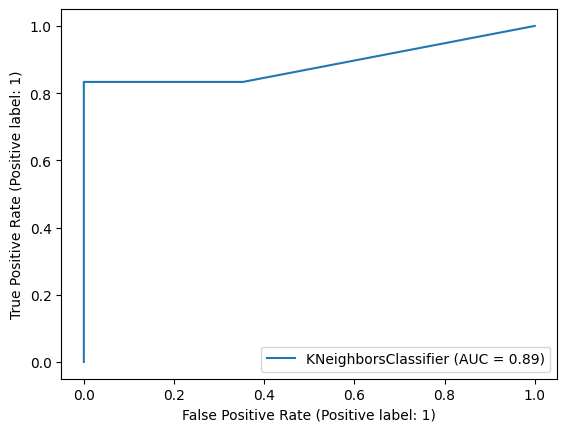

In [8]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(KNN, X_test, Y_test) 


In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred)

array([[34,  0],
       [ 1,  5]])

# Bayes

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [6]:
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

In [7]:
# Evaluate the performance of the classifier using various metrics
accuracy = accuracy_score(Y_test, y_pred)

In [8]:
recall = recall_score(Y_test, y_pred)

In [9]:
print("Recall",recall)

Recall 0.8333333333333334


In [10]:
f1 = f1_score(Y_test, y_pred)

In [11]:
print("F1_Score",f1)

F1_Score 0.4347826086956522


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


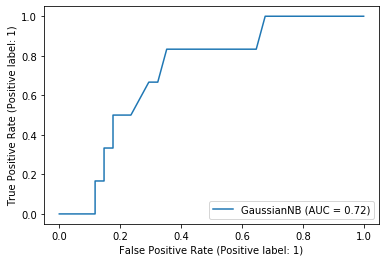

In [13]:


from sklearn.metrics import plot_roc_curve

plot_roc_curve(nb_classifier, X_test, Y_test) 

In [14]:
auc = roc_auc_score(Y_test, y_pred)
print("AUC_SCORE",auc)

AUC_SCORE 0.7401960784313726


In [15]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[22 12]
 [ 1  5]]


# CNN Evaluation

In [16]:
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import resample

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood a

In [17]:
# Reshape the input data for CNN
input_shape = (X_train.shape[1],)


In [18]:
# Build the CNN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
# Train the model
history = model.fit(X_train, Y_train, epochs=12, batch_size=32, validation_split=0.2)

Train on 128 samples, validate on 32 samples
Epoch 1/12
128/128 [==============================] - 0s 3ms/sample - loss: 1.2831 - acc: 0.5781 - val_loss: 2.1706 - val_acc: 0.9062
Epoch 2/12
128/128 [==============================] - 0s 145us/sample - loss: 2.2366 - acc: 0.7188 - val_loss: 3.4636 - val_acc: 0.9062
Epoch 3/12
128/128 [==============================] - 0s 103us/sample - loss: 3.1562 - acc: 0.7500 - val_loss: 4.2544 - val_acc: 0.9062
Epoch 4/12
128/128 [==============================] - 0s 154us/sample - loss: 2.9557 - acc: 0.7812 - val_loss: 4.5301 - val_acc: 0.9062
Epoch 5/12
128/128 [==============================] - 0s 128us/sample - loss: 2.8089 - acc: 0.8125 - val_loss: 4.2328 - val_acc: 0.9062
Epoch 6/12
128/128 [==============================] - 0s 187us/sample - loss: 1.9463 - acc: 0.8047 - val_loss: 3.7083 - val_acc: 0.9062
Epoch 7/12
128/128 [==============================] - 0s 197us/sample - loss: 2.8270 - acc: 0.7969 - val_loss: 3.0344 - val_acc: 0.9062
Epoch

In [21]:
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

print('\nTest accuracy:', test_acc)

40/40 - 0s - loss: 0.4153 - acc: 0.8500

Test accuracy: 0.85


In [26]:
from keras.utils import to_categorical

# assuming your original target array has shape (samples,)
y_train = to_categorical(Y_train) # convert to one-hot encoded vectors


In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])



In [31]:
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

In [32]:
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [38]:
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)


Accuracy: 0.850000


# Random Forest Evaluation

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix












In [ ]:
# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Use the classifier to predict the test set
y_pred = rfc.predict(X_test)

In [16]:
# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)





Accuracy: 0.8866666666666667


In [17]:
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

Precision: 0.9395973154362416


In [18]:
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Recall: 0.8484848484848485


In [19]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.89171974522293


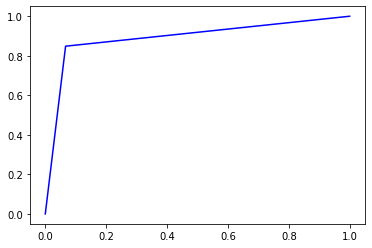

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve')

In [23]:

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n:',cm)

Confusion matrix
: [[126   9]
 [ 25 140]]
